<a href="https://colab.research.google.com/github/saharshhhh/DeepLearning/blob/main/CIFAR10_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

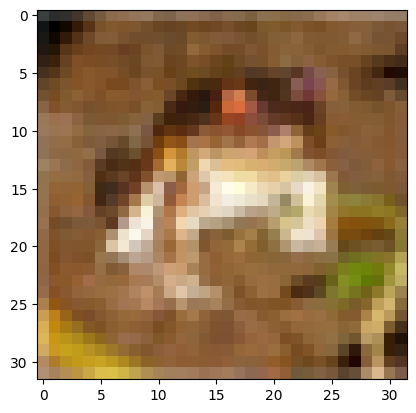

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train[0])

In [3]:
X_train=X_train/255
X_test=X_test/255


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [7]:
img_rows,img_cols=32,32
input_shape=(img_rows,img_cols,3)

In [8]:
model=keras.Sequential()

In [9]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential


In [10]:
model = Sequential()
model.add(Conv2D(90, kernel_size=(2,2), activation='relu', input_shape=input_shape, padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, kernel_size=(2,2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(160, kernel_size=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(160, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 90)     │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 31, 90)     │           360 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 90)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 120)    │        43,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 120)    │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 160)      │        76,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 160)      │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 160)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 160)      │       102,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 160)      │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 160)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        16,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,320 (1.07 MB)

 Trainable params: 278,260 (1.06 MB)

 Non-trainable params: 1,060 (4.14 KB)

In [11]:
hist = model.fit(X_train, y_train, batch_size=200, epochs=20, verbose=1, validation_split=0.15)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.3569 - loss: 1.7470 - val_accuracy: 0.1461 - val_loss: 3.0002
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6063 - loss: 1.1158 - val_accuracy: 0.3292 - val_loss: 2.2368
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6850 - loss: 0.9010 - val_accuracy: 0.5920 - val_loss: 1.1863
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7373 - loss: 0.7569 - val_accuracy: 0.6743 - val_loss: 0.9351
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7773 - loss: 0.6499 - val_accuracy: 0.6807 - val_loss: 0.9360
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8062 - loss: 0.5597 - val_accuracy: 0.7043 - val_loss: 0.8933
Epoch 7/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8304 - loss: 0.4930 - val_accuracy: 0.7280 - val_loss: 0.8310
Epoch 8/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8542 - loss: 0.4255 - val_acc

In [12]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7316 - loss: 1.2969


[1.2890167236328125, 0.7336000204086304]

In [13]:
model.evaluate(X_train, y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9550 - loss: 0.1327


[0.2919902801513672, 0.9239199757575989]

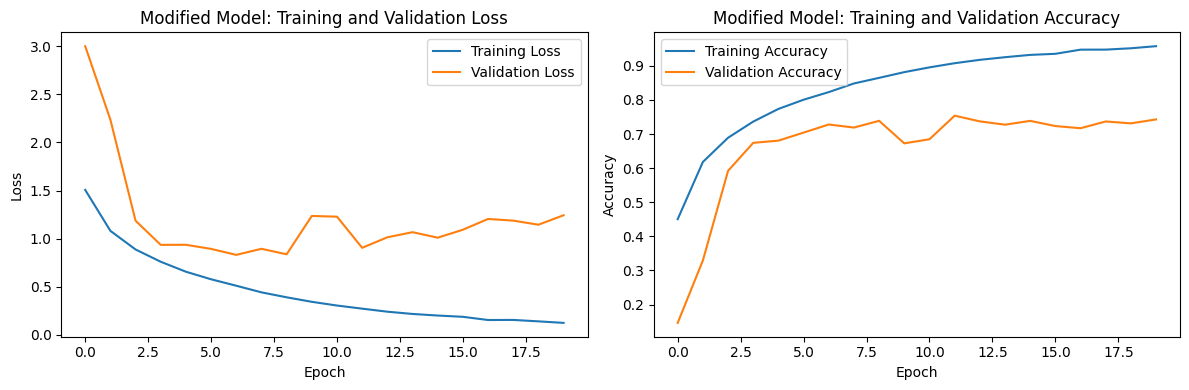

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Modified Model: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified Model: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
y_hat=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [16]:
cifar_labels=['airplane','automobile','bird','cat','deer','dog','frog','ship','horse','duck']

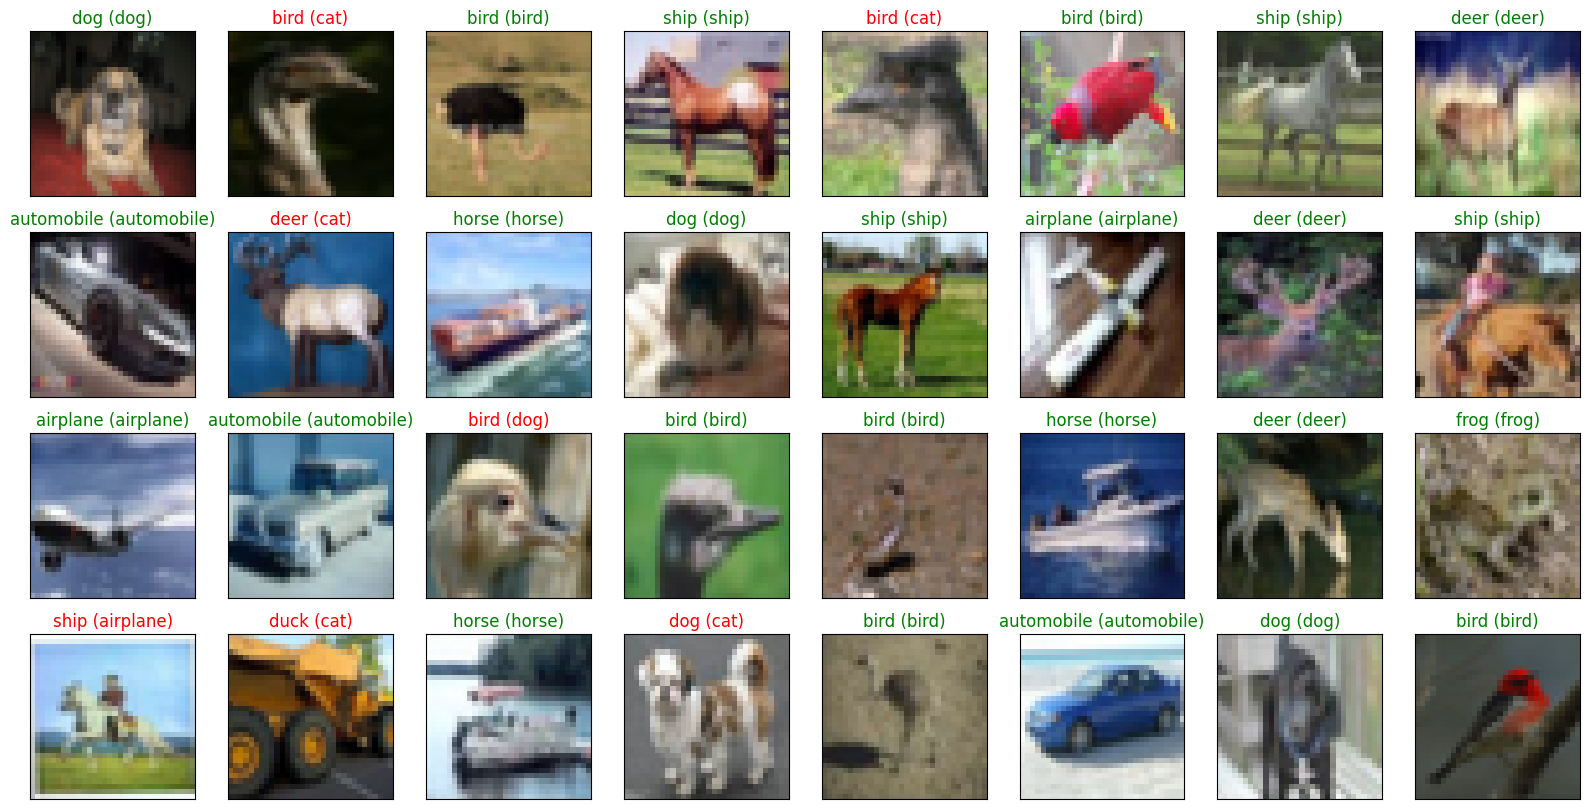

In [17]:
fig=plt.figure(figsize=(20,10))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
  ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[idx])
  prd_idx=np.argmax(y_test[idx])
  true_idx=np.argmax(y_hat[idx])
  ax.set_title("{} ({})".format(cifar_labels[prd_idx],cifar_labels[true_idx]),color=("green" if prd_idx==true_idx else "red"))

In [18]:
!pip install opencv-python

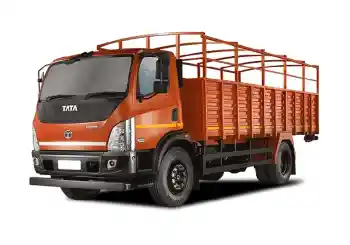

In [19]:
import cv2
from google.colab.patches import cv2_imshow
truck=cv2.imread('/content/truck.webp')
cv2_imshow(truck)

In [20]:
truck.shape

(245, 350, 3)

In [21]:
truck_norm=truck/255
truck_norm

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [22]:
resize_truck=cv2.resize(truck_norm,(32,32))
resize_truck.shape

(32, 32, 3)

In [23]:
prediction=model.predict(resize_truck.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


In [24]:
predicted_class_index = np.argmax(prediction)
print(f"Predicted class: {cifar_labels[predicted_class_index]}")

Predicted class: duck


In [25]:
np.argmax(prediction)

np.int64(9)

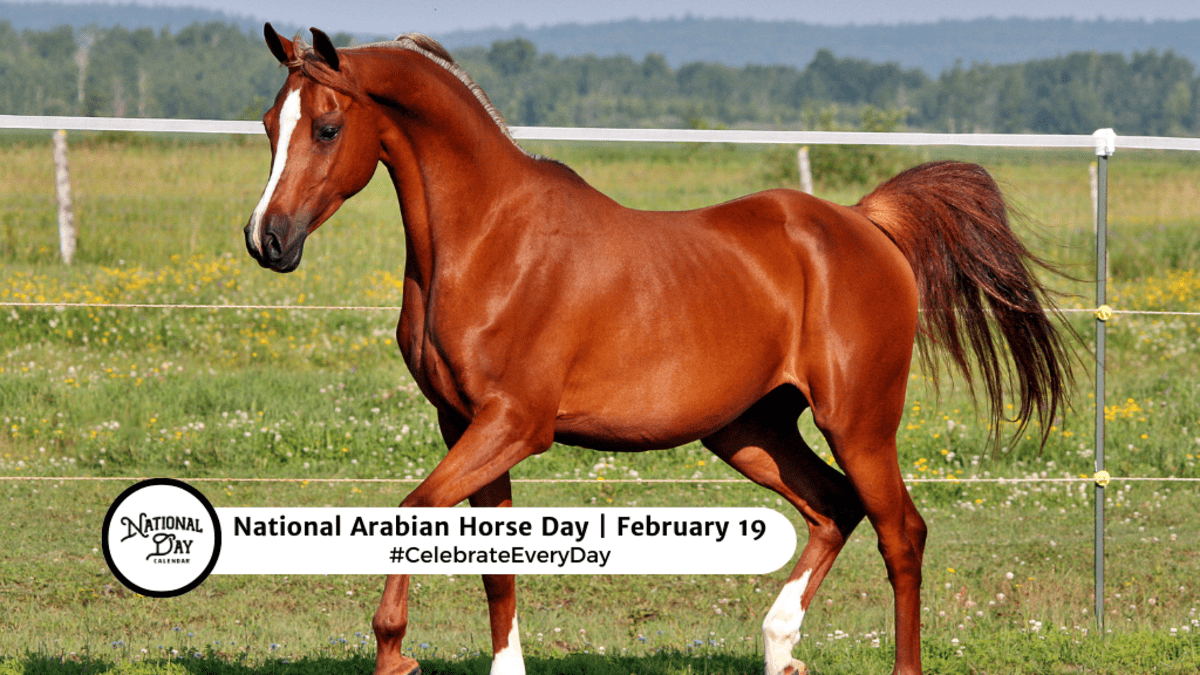

In [26]:
horse=cv2.imread('/content/Horse.png')
cv2_imshow(horse)


In [27]:
horse_rescaled=horse/255

In [28]:
horse_rescaled

array([[[0.74901961, 0.66666667, 0.60392157],
        [0.74901961, 0.66666667, 0.60392157],
        [0.77647059, 0.69019608, 0.63921569],
        ...,
        [0.81568627, 0.7254902 , 0.68235294],
        [0.81568627, 0.7254902 , 0.68235294],
        [0.81568627, 0.7254902 , 0.68235294]],

       [[0.74901961, 0.66666667, 0.60392157],
        [0.74901961, 0.66666667, 0.60392157],
        [0.7254902 , 0.64313725, 0.57254902],
        ...,
        [0.81568627, 0.7254902 , 0.68235294],
        [0.81568627, 0.7254902 , 0.68235294],
        [0.81568627, 0.7254902 , 0.68235294]],

       [[0.7254902 , 0.64313725, 0.57254902],
        [0.7254902 , 0.64313725, 0.57254902],
        [0.7254902 , 0.64313725, 0.57254902],
        ...,
        [0.8       , 0.71372549, 0.66666667],
        [0.81568627, 0.7254902 , 0.68235294],
        [0.81568627, 0.7254902 , 0.68235294]],

       ...,

       [[0.19607843, 0.57647059, 0.61960784],
        [0.18431373, 0.56862745, 0.50980392],
        [0.17254902, 0

In [29]:
horse.shape


(675, 1200, 3)

In [30]:
resize_horse=cv2.resize(horse_rescaled,(32,32))

In [31]:
resize_horse.shape

(32, 32, 3)

In [32]:

prediction=model.predict(resize_horse.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [33]:
predicted_class_index = np.argmax(prediction)
print(f"Predicted class: {cifar_labels[predicted_class_index]}")

Predicted class: airplane


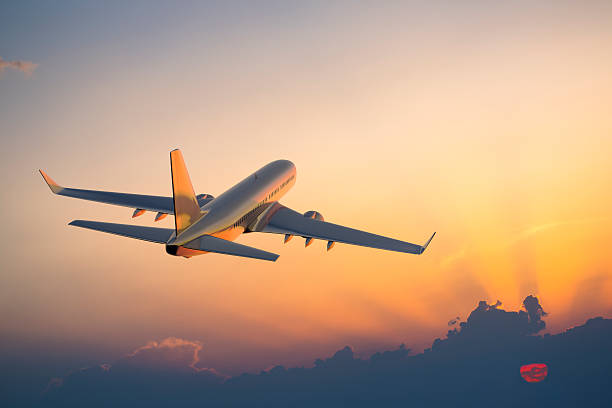

In [34]:
airplane=cv2.imread('/content/airplane.jpg')
cv2_imshow(airplane)

In [35]:
airplane_rescaled=airplane/255

In [36]:
airplane_rescaled.shape

(408, 612, 3)

In [37]:
airplane_reshaped=cv2.resize(airplane_rescaled,(32,32))

In [38]:
airplane_reshaped.shape

(32, 32, 3)

In [39]:
prediction=model.predict(airplane_reshaped.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [40]:
cifar_labels[np.argmax(prediction)]

'airplane'

In [41]:
deer=cv2.imread('/content/deer.jpg')
deer_norm=deer/255
deer_resize=cv2.resize(deer_norm,(32,32))
predicrtion=model.predict(deer_resize.reshape(1,32,32,3))
cifar_labels[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'airplane'